## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
from tensorflow import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
x_train.shape

(50000, 3072)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    output_layer = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

model = build_mlp()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 4s 19ms/step - loss: 2.2606 - accuracy: 0.1544 - val_loss: 2.2174 - val_accuracy: 0.1825
Epoch 2/500
196/196 [==============================] - 3s 18ms/step - loss: 2.1833 - accuracy: 0.2088 - val_loss: 2.1559 - val_accuracy: 0.2244
Epoch 3/500
196/196 [==============================] - 3s 17ms/step - loss: 2.1287 - accuracy: 0.2401 - val_loss: 2.1077 - val_accuracy: 0.2463
Epoch 4/500
196/196 [==============================] - 3s 17ms/step - loss: 2.0841 - accuracy: 0.2616 - val_loss: 2.0670 - val_accuracy: 0.2714
Epoch 5/500
196/196 [==============================] - 4s 19ms/step - loss: 2.0461 - accuracy: 0.2821 - val_loss: 2.0323 - val_accuracy: 0.2821
Epoch 6/500
196/196 [==============================] - 3s 18ms/step - loss: 2.0150 - accuracy: 0.2953 - val_loss: 2.0038 - val_accuracy: 0.2925
Epoch 7/500
196/196 [==============================] - 4s 19ms/step - loss: 1.9887 - accuracy: 0.3066 - val_loss: 1.9801 - val_accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 1.6549 - accuracy: 0.4236 - val_loss: 1.6624 - val_accuracy: 0.4184
Epoch 58/500
196/196 [==============================] - 4s 21ms/step - loss: 1.6515 - accuracy: 0.4244 - val_loss: 1.6595 - val_accuracy: 0.4172
Epoch 59/500
196/196 [==============================] - 4s 22ms/step - loss: 1.6482 - accuracy: 0.4258 - val_loss: 1.6562 - val_accuracy: 0.4209
Epoch 60/500
196/196 [==============================] - 4s 21ms/step - loss: 1.6450 - accuracy: 0.4266 - val_loss: 1.6577 - val_accuracy: 0.4170
Epoch 61/500
196/196 [==============================] - 4s 18ms/step - loss: 1.6420 - accuracy: 0.4270 - val_loss: 1.6516 - val_accuracy: 0.4193
Epoch 62/500
196/196 [==============================] - 4s 20ms/step - loss: 1.6385 - accuracy: 0.4290 - val_loss: 1.6484 - val_accuracy: 0.4214
Epoch 63/500
196/196 [==============================] - 4s 21ms/step - loss: 1.6353 - accuracy: 0.4294 - val_loss: 1.6442 - val_accuracy: 0.421

196/196 [==============================] - 4s 22ms/step - loss: 1.5129 - accuracy: 0.4721 - val_loss: 1.5427 - val_accuracy: 0.4527
Epoch 114/500
196/196 [==============================] - 5s 27ms/step - loss: 1.5110 - accuracy: 0.4732 - val_loss: 1.5382 - val_accuracy: 0.4603
Epoch 115/500
196/196 [==============================] - 6s 28ms/step - loss: 1.5091 - accuracy: 0.4739 - val_loss: 1.5363 - val_accuracy: 0.4573
Epoch 116/500
196/196 [==============================] - 5s 24ms/step - loss: 1.5068 - accuracy: 0.4745 - val_loss: 1.5340 - val_accuracy: 0.4605
Epoch 117/500
196/196 [==============================] - 4s 22ms/step - loss: 1.5055 - accuracy: 0.4754 - val_loss: 1.5329 - val_accuracy: 0.4607
Epoch 118/500
196/196 [==============================] - 4s 22ms/step - loss: 1.5033 - accuracy: 0.4755 - val_loss: 1.5352 - val_accuracy: 0.4568
Epoch 119/500
196/196 [==============================] - 5s 23ms/step - loss: 1.5015 - accuracy: 0.4763 - val_loss: 1.5310 - val_accuracy:

196/196 [==============================] - 5s 24ms/step - loss: 1.4154 - accuracy: 0.5069 - val_loss: 1.4736 - val_accuracy: 0.4756
Epoch 170/500
196/196 [==============================] - 5s 23ms/step - loss: 1.4141 - accuracy: 0.5072 - val_loss: 1.4687 - val_accuracy: 0.4767
Epoch 171/500
196/196 [==============================] - 5s 23ms/step - loss: 1.4125 - accuracy: 0.5076 - val_loss: 1.4682 - val_accuracy: 0.4806
Epoch 172/500
196/196 [==============================] - 4s 22ms/step - loss: 1.4106 - accuracy: 0.5085 - val_loss: 1.4741 - val_accuracy: 0.4736
Epoch 173/500
196/196 [==============================] - 5s 25ms/step - loss: 1.4097 - accuracy: 0.5099 - val_loss: 1.4670 - val_accuracy: 0.4785
Epoch 174/500
196/196 [==============================] - 5s 24ms/step - loss: 1.4076 - accuracy: 0.5090 - val_loss: 1.4637 - val_accuracy: 0.4801
Epoch 175/500
196/196 [==============================] - 5s 24ms/step - loss: 1.4061 - accuracy: 0.5109 - val_loss: 1.4624 - val_accuracy:

196/196 [==============================] - 5s 26ms/step - loss: 1.3331 - accuracy: 0.5358 - val_loss: 1.4245 - val_accuracy: 0.4954
Epoch 226/500
196/196 [==============================] - 5s 27ms/step - loss: 1.3315 - accuracy: 0.5355 - val_loss: 1.4160 - val_accuracy: 0.4999
Epoch 227/500
196/196 [==============================] - 5s 28ms/step - loss: 1.3297 - accuracy: 0.5363 - val_loss: 1.4225 - val_accuracy: 0.4963
Epoch 228/500
196/196 [==============================] - 5s 27ms/step - loss: 1.3284 - accuracy: 0.5368 - val_loss: 1.4211 - val_accuracy: 0.4993
Epoch 229/500
196/196 [==============================] - 5s 25ms/step - loss: 1.3275 - accuracy: 0.5366 - val_loss: 1.4168 - val_accuracy: 0.4971
Epoch 230/500
196/196 [==============================] - 5s 25ms/step - loss: 1.3262 - accuracy: 0.5384 - val_loss: 1.4160 - val_accuracy: 0.4972
Epoch 231/500
196/196 [==============================] - 5s 28ms/step - loss: 1.3247 - accuracy: 0.5386 - val_loss: 1.4136 - val_accuracy:

196/196 [==============================] - 4s 22ms/step - loss: 1.2602 - accuracy: 0.5608 - val_loss: 1.3879 - val_accuracy: 0.5096
Epoch 282/500
196/196 [==============================] - 5s 27ms/step - loss: 1.2594 - accuracy: 0.5614 - val_loss: 1.3851 - val_accuracy: 0.5096
Epoch 283/500
196/196 [==============================] - 6s 28ms/step - loss: 1.2585 - accuracy: 0.5596 - val_loss: 1.3806 - val_accuracy: 0.5131
Epoch 284/500
196/196 [==============================] - 5s 28ms/step - loss: 1.2567 - accuracy: 0.5613 - val_loss: 1.4073 - val_accuracy: 0.5020
Epoch 285/500
196/196 [==============================] - 5s 28ms/step - loss: 1.2558 - accuracy: 0.5612 - val_loss: 1.4011 - val_accuracy: 0.5051
Epoch 286/500
196/196 [==============================] - 4s 23ms/step - loss: 1.2545 - accuracy: 0.5627 - val_loss: 1.3851 - val_accuracy: 0.5104
Epoch 287/500
196/196 [==============================] - 4s 22ms/step - loss: 1.2527 - accuracy: 0.5640 - val_loss: 1.3906 - val_accuracy:

196/196 [==============================] - 4s 22ms/step - loss: 1.1942 - accuracy: 0.5830 - val_loss: 1.3659 - val_accuracy: 0.5201
Epoch 338/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1927 - accuracy: 0.5863 - val_loss: 1.3796 - val_accuracy: 0.5126
Epoch 339/500
196/196 [==============================] - 5s 23ms/step - loss: 1.1924 - accuracy: 0.5841 - val_loss: 1.3546 - val_accuracy: 0.5224
Epoch 340/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1915 - accuracy: 0.5849 - val_loss: 1.3766 - val_accuracy: 0.5125
Epoch 341/500
196/196 [==============================] - 5s 23ms/step - loss: 1.1896 - accuracy: 0.5861 - val_loss: 1.3547 - val_accuracy: 0.5219
Epoch 342/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1891 - accuracy: 0.5855 - val_loss: 1.3560 - val_accuracy: 0.5234
Epoch 343/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1877 - accuracy: 0.5856 - val_loss: 1.3587 - val_accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 1.1327 - accuracy: 0.6068 - val_loss: 1.3866 - val_accuracy: 0.5135
Epoch 394/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1327 - accuracy: 0.6054 - val_loss: 1.3566 - val_accuracy: 0.5253
Epoch 395/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1319 - accuracy: 0.6070 - val_loss: 1.3524 - val_accuracy: 0.5212
Epoch 396/500
196/196 [==============================] - 5s 27ms/step - loss: 1.1307 - accuracy: 0.6055 - val_loss: 1.3601 - val_accuracy: 0.5199
Epoch 397/500
196/196 [==============================] - 5s 23ms/step - loss: 1.1293 - accuracy: 0.6070 - val_loss: 1.4211 - val_accuracy: 0.5002
Epoch 398/500
196/196 [==============================] - 5s 23ms/step - loss: 1.1280 - accuracy: 0.6094 - val_loss: 1.3940 - val_accuracy: 0.5072
Epoch 399/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1266 - accuracy: 0.6090 - val_loss: 1.3483 - val_accuracy:

196/196 [==============================] - 4s 22ms/step - loss: 1.0735 - accuracy: 0.6270 - val_loss: 1.3460 - val_accuracy: 0.5302
Epoch 450/500
196/196 [==============================] - 4s 22ms/step - loss: 1.0732 - accuracy: 0.6249 - val_loss: 1.3631 - val_accuracy: 0.5263
Epoch 451/500
196/196 [==============================] - 4s 22ms/step - loss: 1.0745 - accuracy: 0.6267 - val_loss: 1.3372 - val_accuracy: 0.5314
Epoch 452/500
196/196 [==============================] - 4s 21ms/step - loss: 1.0711 - accuracy: 0.6276 - val_loss: 1.3588 - val_accuracy: 0.5185
Epoch 453/500
196/196 [==============================] - 4s 21ms/step - loss: 1.0697 - accuracy: 0.6280 - val_loss: 1.3925 - val_accuracy: 0.5145
Epoch 454/500
196/196 [==============================] - 4s 20ms/step - loss: 1.0695 - accuracy: 0.6295 - val_loss: 1.3617 - val_accuracy: 0.5271
Epoch 455/500
196/196 [==============================] - 4s 20ms/step - loss: 1.0686 - accuracy: 0.6283 - val_loss: 1.3515 - val_accuracy:

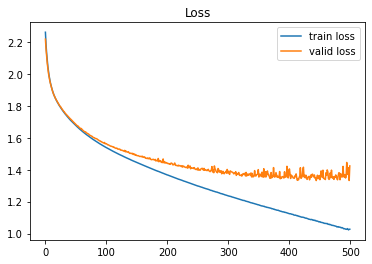

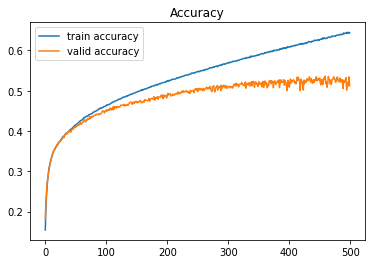

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()